In [4]:
import numpy as np
import matplotlib.pyplot as plt
import string
import time
from IPython import display
import matplotlib.animation as animation

#first, find how many processes there are to initialise the arrays where their information will be stored
myfile = open("post_processing/p_0_info.txt")
txt = myfile.read()
myfile.close()
info = txt.split("&")
info = info[1:]
processes = int(info[3])

#initialise arrays where process information will be stored
ID = np.zeros(processes)
local_rows = np.zeros(processes)
local_cols = np.zeros(processes)
ROWS = np.zeros(processes)
COLS = np.zeros(processes)
rows = np.zeros(processes)
cols = np.zeros(processes)
process_row = np.zeros(processes)
process_col = np.zeros(processes)
filenames = []

for i in range(processes): #extracts the information about each process and stores it in an array
    # such as rows, cols, number of processes, process id, etc.
    filenames.append("post_processing/p_" + str(i) + "_info.txt")
    myfile = open(filenames[i])
    txt = myfile.read()
    myfile.close()
    info = txt.split("&")
    info = info[1:] # remove first bad item
    ID[i] = int(info[0])
    local_rows[i] = int(info[1]) 
    local_cols[i] = int(info[2]) #to account for the padding
    ROWS[i] = info[4]
    COLS[i] = info[5]
    rows[i] = info[6]
    cols[i] = info[7]
    process_row[i] = info[8]
    process_col[i] = info[9]
print(info)

['1', '20', '20', '2', '20', '40', '1', '2', '0', '1']


In [5]:
def calc_iteration(k): #extracts the data for different processes for a whole iteration of the game of life
    #and assembles the subdomains into a single domain - stored in an nd array
    filenames = []
    final_array = np.zeros((int(ROWS[0]), int(COLS[0])))
    iteration = np.array(processes)
    for i in range (processes):
        col_count = 0   
        filenames.append("post_processing/p_" + str(i) + "_out.txt")
        myfile = open(filenames[i])
        txt = myfile.read()
        myfile.close()
        data = txt.split("/Iteration/")
        data = data[1:] # remove first bad item
        iteration = data[k][1:].split(",") #obtain list that contains all values for a single iteration and processor
        iteration = [int(j) for j in iteration] #convert strings into ints
        iteration = np.array(iteration)
        iteration = np.reshape(iteration, (-1, int(local_cols[i]+2))) # assembly the subdomains into a domain
        iteration = iteration[1:-1, 1:-1] 
        # puts subdomain in its right place
        final_array[int(process_row[i]*local_rows[i]):int((process_row[i]+1)*local_rows[i]), int(process_col[i]*local_cols[i]):int((process_col[i]+1)*local_cols[i])]  = iteration
    return final_array

<IPython.core.display.Javascript object>


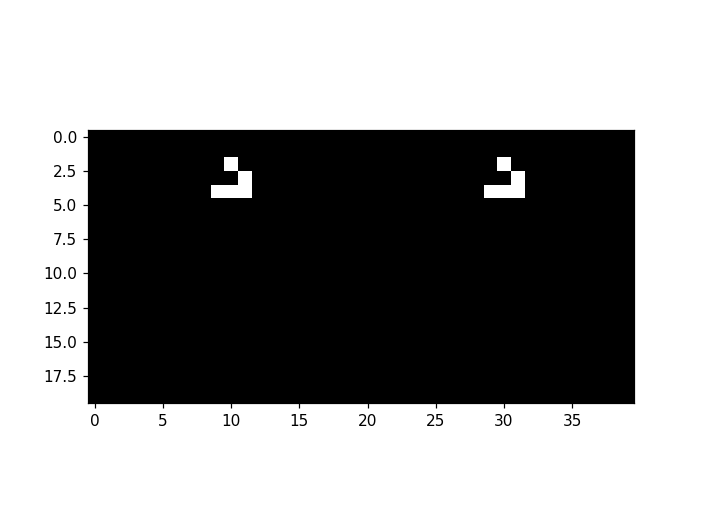

In [6]:
# Required line for plotting the animation
%matplotlib notebook

def update(i, img):
    iteration = calc_iteration(i)
    img.set_data(iteration) 

# Helper function that updates the board and returns a new image of
# the updated board animate is the function that FuncAnimation calls
def animate(frame):
    im.set_data(update_board(my_board))
    return im,

# set animation update interval 
updateInterval = 1

# set up animation 
fig, ax = plt.subplots() 
img = ax.imshow(iteration, cmap='gray') #, interpolation='nearest'
ani = animation.FuncAnimation(fig, update, fargs=(img, ), 
                              frames = 1000, 
                              interval=updateInterval, 
                              save_count=50)
#ani.save('post_processing/animation.gif', writer='imagemagick', fps=60) #uncomment this to produce animation
plt.show()